In [ ]:
import requests
import pandas as pd

In [ ]:
stock_symbols = pd.read_csv("/content/stock_list.csv")

In [ ]:
stock_symbols.head()

,Symbol
0,A
1,AA
2,AABA
3,AAC
4,AAL


In [ ]:
stock_symbols['Symbol'] = stock_symbols['Symbol'].str.replace('^', '')

In [ ]:
display(stock_symbols.shape)

(5807, 1)

In [ ]:
# breaking 5807 stock symbols to multiple groups with 100 stocks for each group
n = 100
group_symbols = [stock_symbols[i:i+n] for i in range(0, stock_symbols.shape[0], n)]

In [ ]:
example_group = group_symbols[0]['Symbol']
list(example_group[:5])

['A', 'AA', 'AABA', 'AAC', 'AAL']

In [ ]:
stock_data = pd.read_csv("/content/stock_data.csv")

In [ ]:
stock_data

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,...,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,...,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.39520,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.00000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.00000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.00000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,...,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.00000,736602.0,736600.0,29469660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,0.00000,0.00000,1.90871,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,111.09060,0.0,0.0,ZUO,7.17528,7.72993,1904027.0,1904030.0,46318490.0
5218,0.90534,19.36885,4.04713,0.0,0.656000,2019-07-18 00:00:00.0,0.164000,2019-09-03 00:00:00.0,0.58,0.0,...,0.0,478.65620,0.0,0.0,ZTS,73.55325,278.11830,2191109.0,2191110.0,43554260.0
5219,1.10168,13.16401,3.20503,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,32.24502,0.0,0.0,ZYXI,0.18043,0.17938,529392.0,529390.0,4265350.0
5220,4.87383,0.00000,9.94119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,21.07500,0.0,0.0,ZYNE,0.00000,0.00000,1781784.0,1781780.0,57661610.0


In [ ]:
display(stock_data.shape)

(5222, 46)

In [ ]:
columns = stock_data.columns
columns

Index(['beta', 'bookValuePerShare', 'currentRatio', 'divGrowthRate3Year',
       'dividendAmount', 'dividendDate', 'dividendPayAmount',
       'dividendPayDate', 'dividendYield', 'epsChange', 'epsChangePercentTTM',
       'epsChangeYear', 'epsTTM', 'grossMarginMRQ', 'grossMarginTTM', 'high52',
       'interestCoverage', 'low52', 'ltDebtToEquity', 'marketCap',
       'marketCapFloat', 'netProfitMarginMRQ', 'netProfitMarginTTM',
       'operatingMarginMRQ', 'operatingMarginTTM', 'pbRatio', 'pcfRatio',
       'peRatio', 'pegRatio', 'prRatio', 'quickRatio', 'returnOnAssets',
       'returnOnEquity', 'returnOnInvestment', 'revChangeIn', 'revChangeTTM',
       'revChangeYear', 'sharesOutstanding', 'shortIntDayToCover',
       'shortIntToFloat', 'symbol', 'totalDebtToCapital', 'totalDebtToEquity',
       'vol10DayAvg', 'vol1DayAvg', 'vol3MonthAvg'],
      dtype='object')

In [ ]:
# technically speaking, we can cluster on all 46 attributes. In this project, I am going to purposely restricting the number of attributes to 3
# to visualize 3 dimensions of data
# As we add more attributes, the tendency for the datapoints to move further and further away is going to increase. So, it's going to be hard
# to find similar data.

In [ ]:
metrics = ['returnOnEquity', 'returnOnAssets', 'returnOnInvestment', 'symbol']
filtered_stock = stock_data[metrics]
filtered_stock.head()

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
1,0.00000,0.0000,0.00000,ADVM
2,6.76543,4.0626,5.47783,AAXN
3,0.00000,0.0000,0.00000,ACTG
4,0.00000,0.0000,0.00000,AAXJ


In [ ]:
# cleaning data
# remove 0 value

filtered_stock_replaced = filtered_stock.replace(0, pd.NA)
df_cleaned = filtered_stock_replaced.dropna()
df_cleaned

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
2,6.76543,4.0626,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW
...,...,...,...,...
5210,19.09124,9.85912,11.23353,XEC
5214,10.75764,2.8239,3.11655,XEL
5215,10.69201,6.01686,7.3406,ZUMZ
5218,62.89455,13.72299,15.36965,ZTS


In [ ]:
# set stock names as indicators
df_metrics = df_cleaned.set_index('symbol')
df_metrics

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,48.18294,15.8055,21.30287
AAXN,6.76543,4.0626,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
...,...,...,...
XEC,19.09124,9.85912,11.23353
XEL,10.75764,2.8239,3.11655
ZUMZ,10.69201,6.01686,7.3406


In [ ]:
roe_filter = df_metrics.iloc[:,0] < 40
roe_filter

symbol
AAPL    False
AAXN     True
ADES    False
ACCO     True
AAWW     True
        ...  
XEC      True
XEL      True
ZUMZ     True
ZTS     False
ZYXI    False
Name: returnOnEquity, Length: 2102, dtype: bool

In [ ]:
roa_filter = df_metrics.iloc[:,1] < 30
roi_filter = df_metrics.iloc[:,2] < 30

In [ ]:
roe_count = roe_filter.value_counts()
display(roe_count)
roa_count = roa_filter.value_counts()
display(roa_count)
roi_count = roi_filter.value_counts()
display(roi_count)

returnOnEquity
True     1909
False     193
Name: count, dtype: int64

returnOnAssets
True     2058
False      44
Name: count, dtype: int64

returnOnInvestment
True     2021
False      81
Name: count, dtype: int64

In [ ]:
df_metrics_updated = df_metrics[roe_filter & roa_filter & roi_filter]
df_metrics_updated

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAXN,6.76543,4.0626,5.47783
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
ADUS,7.51694,5.33343,6.52183
AB,15.52055,15.50523,15.50523
...,...,...,...
WY,2.13579,1.08519,1.15484
YORW,10.98093,3.99952,4.19197
XEC,19.09124,9.85912,11.23353


In [ ]:
# Statistical Summary
df_metrics_updated = df_metrics_updated.astype('float')
df_stats = df_metrics_updated.describe()
df_stats

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750


In [ ]:
# add standard deviation
df_stats.loc['+3_std'] = df_stats.loc['mean'] + (df_stats.loc['std'] * 3)
df_stats.loc['-3_std'] = df_stats.loc['mean'] - (df_stats.loc['std'] * 3)
df_stats

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3_std,38.693367,19.711394,25.051107
-3_std,-13.515624,-7.781876,-9.894485


In [ ]:
# 3D Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

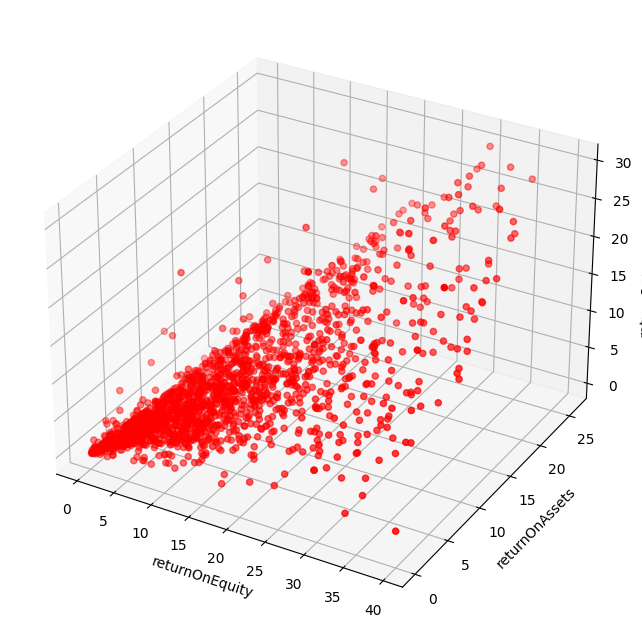

In [ ]:
x = list(df_metrics_updated.iloc[:, 0])
y = list(df_metrics_updated.iloc[:, 1])
z = list(df_metrics_updated.iloc[:, 2])

col_name = df_metrics_updated.columns
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d') # create 3d axis

ax.set_xlabel(col_name[0])
ax.set_ylabel(col_name[1])
ax.set_zlabel(col_name[2])

ax.scatter(x, y, z, c='red', marker = 'o')
plt.show()

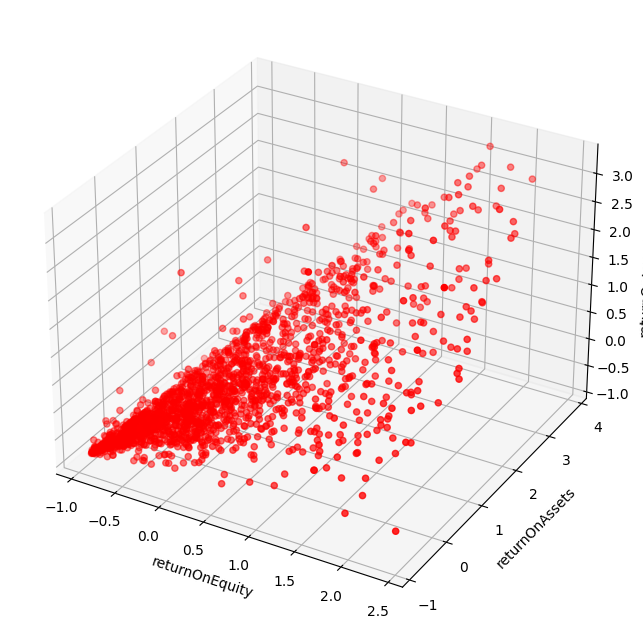

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

data_scaled = robust_scaler.fit_transform(df_metrics_updated)

x_scaled = data_scaled[:, 0] # numpy array form
y_scaled = data_scaled[:, 1]
z_scaled = data_scaled[:, 2]

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(111, projection='3d') # create 3d axis

ax.set_xlabel(col_name[0])
ax.set_ylabel(col_name[1])
ax.set_zlabel(col_name[2])

ax.scatter(x_scaled, y_scaled, z_scaled, c='red', marker = 'o')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

[0.88529636 0.09818477 0.01651887]


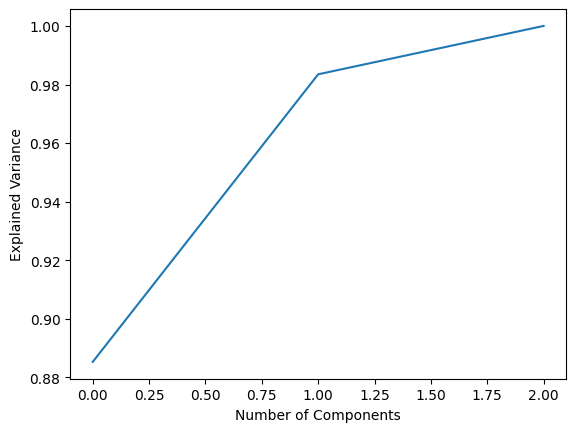

In [ ]:
pca = PCA().fit(data_scaled)
print(pca.explained_variance_ratio_)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

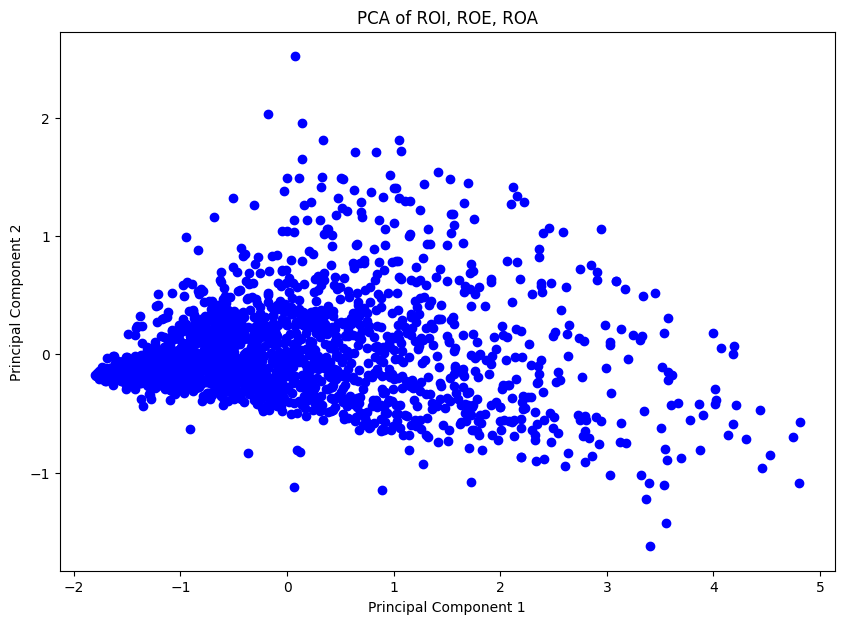

In [ ]:
pca = PCA(n_components=2)
principle_components = pca.fit_transform(data_scaled) # array form
df_pca = pd.DataFrame(data=principle_components, columns=['PC1', 'PC2']) # dataframe form

# plotting
plt.figure(figsize=(10,7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of ROI, ROE, ROA')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(principle_components)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[3406.81429964157,
 1343.387746951088,
 802.8903364871953,
 608.1264547333009,
 487.77965160148676,
 389.4365498885711,
 333.5778893101967,
 292.14474570197564,
 264.5045130650318]

Text(0.5, 1.0, 'The Elbow Method')

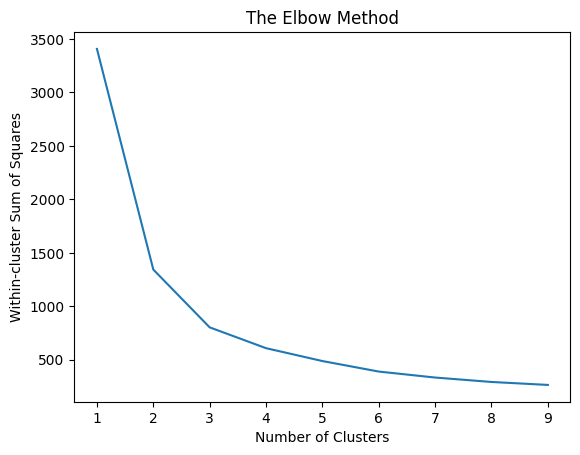

In [ ]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('The Elbow Method')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


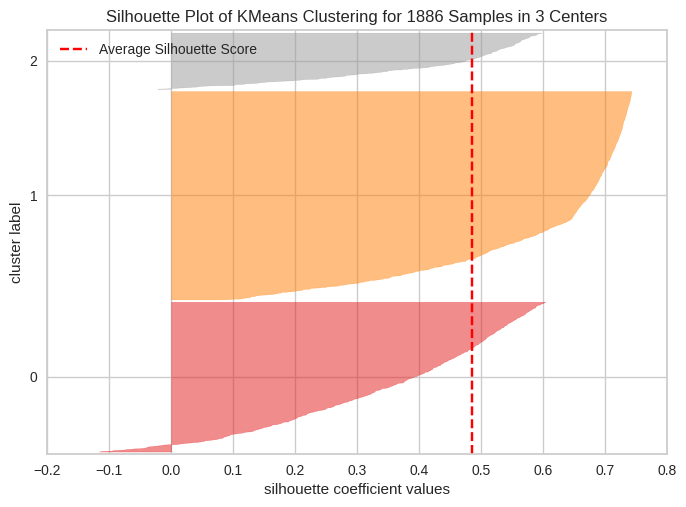

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1886 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters=3, random_state=0)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(principle_components)
visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


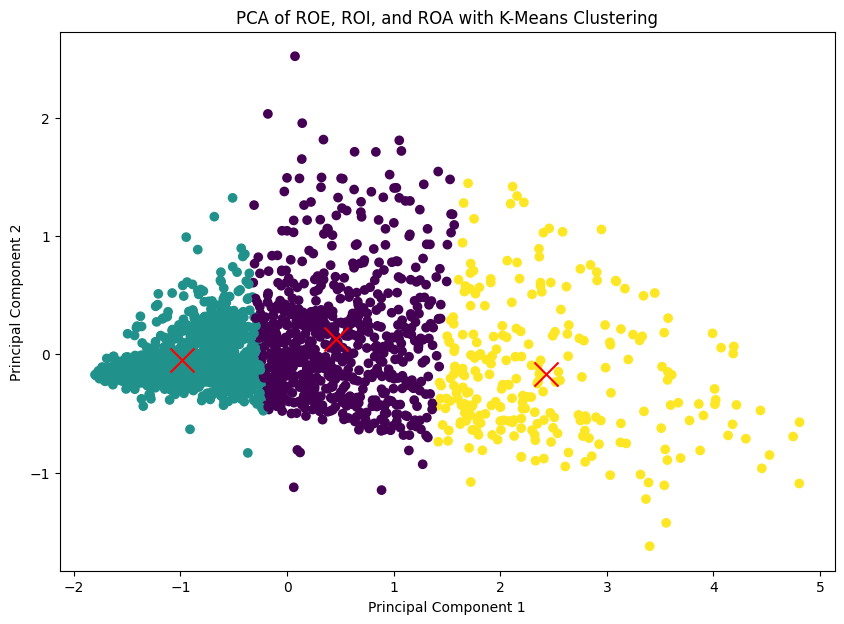

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_pca)
df_pca['Cluster'] = clusters

cluster_centers = kmeans.cluster_centers_
C1 = cluster_centers[:, 0]
C2 = cluster_centers[:, 1]

plt.figure(figsize=(10,7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], marker='o')
plt.scatter(C1, C2, s=300, c='red', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of ROE, ROI, and ROA with K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-48-4355517482e1>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(C1, C2, C3, s=800, c='red', marker='x', edgecolor='k', linewidths=5, label='Cluster Centers')


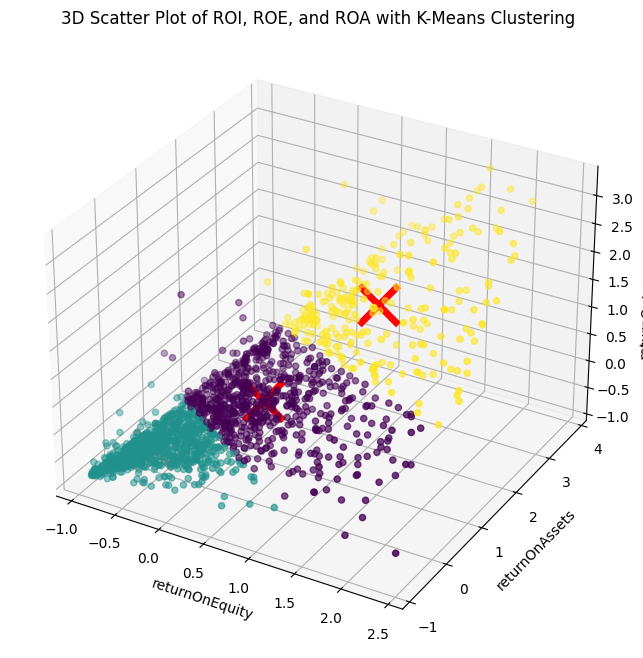

In [ ]:
robust_scaler = RobustScaler()
data_scaled = robust_scaler.fit_transform(df_metrics_updated)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

x_scaled = data_scaled[:, 0] # numpy array form
y_scaled = data_scaled[:, 1]
z_scaled = data_scaled[:, 2]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d') # create 3d axis

cluster_centers = kmeans.cluster_centers_
C1 = cluster_centers[:, 0]
C2 = cluster_centers[:, 1]
C3 = cluster_centers[:, 2]

ax.set_xlabel(col_name[0])
ax.set_ylabel(col_name[1])
ax.set_zlabel(col_name[2])

ax.scatter(x_scaled, y_scaled, z_scaled, c=clusters, marker = 'o')
ax.scatter(C1, C2, C3, s=800, c='red', marker='x', edgecolor='k', linewidths=5, label='Cluster Centers')
plt.title('3D Scatter Plot of ROI, ROE, and ROA with K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-69-24628fc4929b>:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(C1, C2, C3, s=800, c='red', marker='x', edgecolor='k', linewidths=5, label='Cluster Centers')


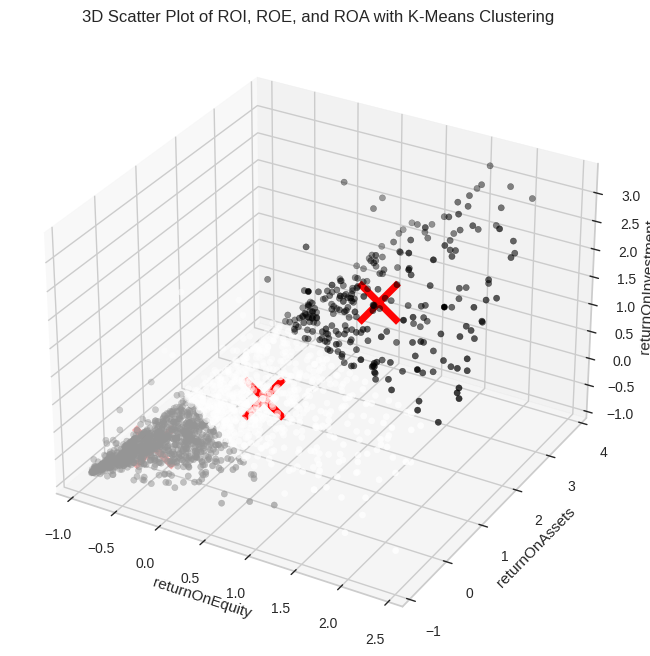

In [69]:
kmeanspp = KMeans(n_clusters=3, init='k-means++', random_state=0)
clusters = kmeanspp.fit_predict(data_scaled)

x_scaled = data_scaled[:, 0] # numpy array form
y_scaled = data_scaled[:, 1]
z_scaled = data_scaled[:, 2]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d') # create 3d axis

cluster_centers = kmeanspp.cluster_centers_
C1 = cluster_centers[:, 0]
C2 = cluster_centers[:, 1]
C3 = cluster_centers[:, 2]

ax.set_xlabel(col_name[0])
ax.set_ylabel(col_name[1])
ax.set_zlabel(col_name[2])

ax.scatter(x_scaled, y_scaled, z_scaled, c=clusters, marker = 'o')
ax.scatter(C1, C2, C3, s=800, c='red', marker='x', edgecolor='k', linewidths=5, label='Cluster Centers')
plt.title('3D Scatter Plot of ROI, ROE, and ROA with K-Means Clustering')
plt.show()

In [67]:
data_scaled

array([[-0.36181672, -0.12578097, -0.09142035],
       [ 0.15814575, -0.21928246, -0.24899949],
       [ 0.08805092, -0.10239979, -0.16348906],
       ...,
       [ 0.68007184,  0.91109077,  0.6897436 ],
       [-0.02435915, -0.34735754, -0.41189342],
       [-0.02990679,  0.22379377,  0.1613949 ]])

In [61]:
df_metrics_updated['Cluster'] = clusters
df_metrics_updated

,index,symbol,returnOnEquity,returnOnAssets,returnOnInvestment,Cluster
0,0,AAXN,6.76543,4.06260,5.47783,1
1,1,ACCO,12.91672,3.53989,4.31677,1
2,2,AAWW,12.08748,4.19331,4.94682,1
3,3,ADUS,7.51694,5.33343,6.52183,1
4,4,AB,15.52055,15.50523,15.50523,2
...,...,...,...,...,...,...
1881,1881,WY,2.13579,1.08519,1.15484,1
1882,1882,YORW,10.98093,3.99952,4.19197,1
1883,1883,XEC,19.09124,9.85912,11.23353,0
1884,1884,XEL,10.75764,2.82390,3.11655,1


In [57]:
df_metrics_updated.reset_index(inplace=True)
df_metrics_updated

,index,symbol,returnOnEquity,returnOnAssets,returnOnInvestment
0,0,AAXN,6.76543,4.06260,5.47783
1,1,ACCO,12.91672,3.53989,4.31677
2,2,AAWW,12.08748,4.19331,4.94682
3,3,ADUS,7.51694,5.33343,6.52183
4,4,AB,15.52055,15.50523,15.50523
...,...,...,...,...,...
1881,1881,WY,2.13579,1.08519,1.15484
1882,1882,YORW,10.98093,3.99952,4.19197
1883,1883,XEC,19.09124,9.85912,11.23353
1884,1884,XEL,10.75764,2.82390,3.11655


In [65]:
def find_stock_cluster(df, stock_symbol):
    # Check if the stock symbol is in the DataFrame
    if stock_symbol in df['symbol'].values:
        # Find the cluster for the given stock symbol
        cluster = df.loc[df['symbol'] == stock_symbol, 'Cluster'].values[0]
        return f"Stock {stock_symbol} is in cluster {cluster}."
    else:
        return f"No stock found in the dataset for symbol {stock_symbol}."

# Example usage
stock_symbol = 'AAPL'
print(find_stock_cluster(df_metrics_updated, stock_symbol))

No stock found in the dataset for symbol AAPL.


In [66]:
# Identify stocks in each cluster
cluster_0 = df_metrics_updated[df_metrics_updated['Cluster'] == 0]
cluster_1 = df_metrics_updated[df_metrics_updated['Cluster'] == 1]
cluster_2 = df_metrics_updated[df_metrics_updated['Cluster'] == 2]

# Select one stock from each cluster for diversification
portfolio = {
    'Cluster 0': cluster_0.sample(n=1)['symbol'].values[0],
    'Cluster 1': cluster_1.sample(n=1)['symbol'].values[0],
    'Cluster 2': cluster_2.sample(n=1)['symbol'].values[0]
}
print("Suggested diversified portfolio:", portfolio)

Suggested diversified portfolio: {'Cluster 0': 'XEC', 'Cluster 1': 'HMC', 'Cluster 2': 'NBLX'}


In [ ]:
# make some predictions
